In [1]:
# load some libraries that I frequently use. 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, save_model, load_model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset as 'numpy array'
dataset = np.loadtxt('../data/A_Z Handwritten Data.csv', delimiter= ',')

In [14]:
# Divide the dataset into two parts, one is 'Explanaory variable', the other is 'Target'
X = dataset[:, 0:784]
Y = dataset[:,0]

# Split the 'X, Y' data into the ratio of 7:3, 3 is the test size.

(X_train, X_test, Y_train, Y_test) = train_test_split(X,Y, test_size= 0.3, 
                                                      random_state=2)

In [15]:
# Reshape the data and change it into float 32

X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [16]:
# The pixcel of the data is comprised from 0 to 255. 0 is white, 255 is black.
# Now we normalize the data from 0 to 1 without some libraries, in a simple way.

X_train = X_train / 255
X_test = X_test / 255

In [17]:
# One-Hot-Encoding of the target

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# Define the classification of 26 alphabets.

num_classes = Y_test.shape[1]

In [35]:
# Build an ordinary 'Deep Learning model' with CNN and Max Pooling by using  and ADAM

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = (28,28,1),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Optimizer and compilation

model.compile(optimizer= 'rmsprop', 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [36]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_13 (Dense)             (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
________________________________________________

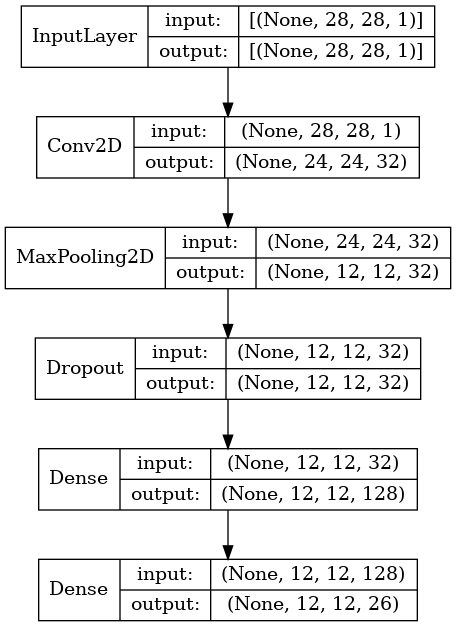

In [12]:
from tensorflow.keras.utils import plot_model
import pydot
import pydotplus
import tensorflow as tf

plot_model(model, to_file='../www/CNN2_dropout.png', show_shapes=True,
            show_layer_names=False)

In [37]:
# Fit the train data of model

Train_dropout = model.fit(X_train, Y_train, batch_size= 128, epochs= 5)

Epoch 1/5
2037/2037 [==============================] - 47s 23ms/step - loss: 0.4148 - accuracy: 0.8842
Epoch 2/5
2037/2037 [==============================] - 46s 23ms/step - loss: 0.0734 - accuracy: 0.9799
Epoch 3/5
2037/2037 [==============================] - 46s 23ms/step - loss: 0.0539 - accuracy: 0.9852
Epoch 4/5
2037/2037 [==============================] - 46s 23ms/step - loss: 0.0431 - accuracy: 0.98820s - loss: 0
Epoch 5/5
2037/2037 [==============================] - 46s 23ms/step - loss: 0.0347 - accuracy: 0.9904


In [38]:
# Check the test data for the model

Test_dropout = model.fit(X_test, Y_test, batch_size=128, epochs=5)

Epoch 1/5
873/873 [==============================] - 20s 23ms/step - loss: 0.0494 - accuracy: 0.9875
Epoch 2/5
873/873 [==============================] - 20s 23ms/step - loss: 0.0381 - accuracy: 0.9899
Epoch 3/5
873/873 [==============================] - 20s 23ms/step - loss: 0.0309 - accuracy: 0.9916
Epoch 4/5
873/873 [==============================] - 20s 23ms/step - loss: 0.0256 - accuracy: 0.9929
Epoch 5/5
873/873 [==============================] - 20s 23ms/step - loss: 0.0226 - accuracy: 0.9937


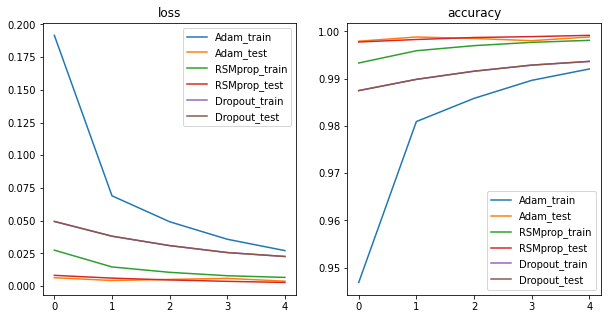

In [39]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric) 
    plt_adam_train = Train_Adam.history[metric] 
    plt_adam_test = Test_Adam.history[metric]
    plt_rsmprop_train = Train_rmsprop.history[metric] 
    plt_rsmprop_test = Test_rmsprop.history[metric]
    plt_dropout_train = Test_dropout.history[metric]
    plt_dropout_test = Test_dropout.history[metric]
 
    #plot them all
    plt.plot(plt_adam_train, label='Adam_train') 
    plt.plot(plt_adam_test, label='Adam_test')
    plt.plot(plt_rsmprop_train, label = 'RSMprop_train')
    plt.plot(plt_rsmprop_test, label = 'RSMprop_test')
    plt.plot(plt_dropout_train, label = 'Dropout_train')
    plt.plot(plt_dropout_test, label = 'Dropout_test')

    plt.legend() 
plt.show()

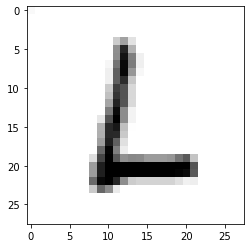

In [15]:
# Predict some random pictures
#import numpy and give a seed. 

np.random.seed(2)

#Show 3 letter at random and convert them into gray scale letters. 
plt.imshow(X_train[911].reshape(28,28), cmap='Greys')
plt.show()



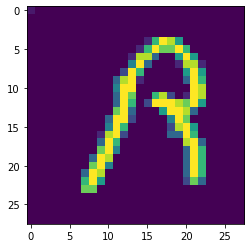

(28, 28, 1)


In [16]:
reshaped_image = X_train[2].reshape(28, 28, 1).astype('float32')

reshaped_image = reshaped_image / 255

to_predict = np.array(reshaped_image)


plt.imshow(reshaped_image)
plt.show()

print(to_predict.shape)


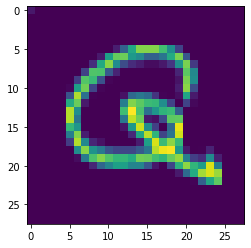

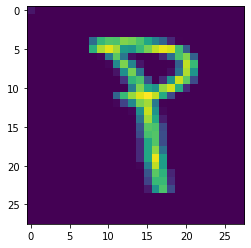

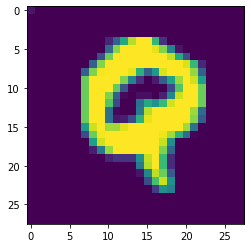

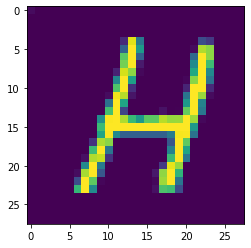

In [17]:
use_samples = [5, 38, 4, 10]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = X_train[sample].reshape( 28, 28, 1).astype('float32')
  reshaped_image = reshaped_image / 255

  plt.imshow(reshaped_image)
  plt.show()
  samples_to_predict.append(X_train[sample])

In [18]:
samples_2_predict = np.array(samples_to_predict)
print(samples_2_predict.shape)

(4, 28, 28, 1)


In [15]:
#model = load_model('../python_scripts/saved_model/')

In [19]:
predictions = model.predict(samples_2_predict)

classes = np.argmax(predictions, axis = 1)

output_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


result = [output_labels[i] for i in classes]

print(result)

['Q', 'P', 'Q', 'H']


In [26]:
predictions = model.predict(samples_2_predict)


array([0.99999523, 0.9994307 , 0.9944089 , 0.9999999 ], dtype=float32)

In [33]:
filepath = './model_dropout'
save_model(model, filepath)

INFO:tensorflow:Assets written to: ./model_dropout/assets
